In [1]:
from def_dict import *
import glob, os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
org_path = 'data/w58y67/org'
load_path = 'data/w58y67/step_1/'
save_path = 'data/w58y67/step_2/'
if_not_make(save_path)

In [4]:
data_name = np.load('%s/data_name.npy'%load_path)
data_syllable = np.load('%s/data_syllables.npy'%load_path)
data_name.shape, data_syllable.shape

((3210,), (55037, 3))

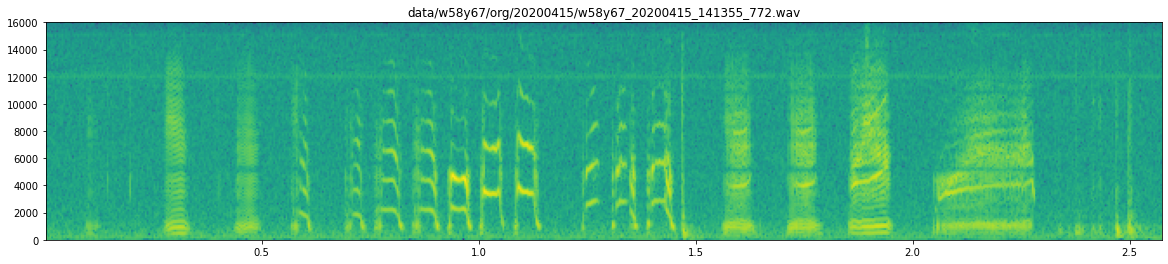

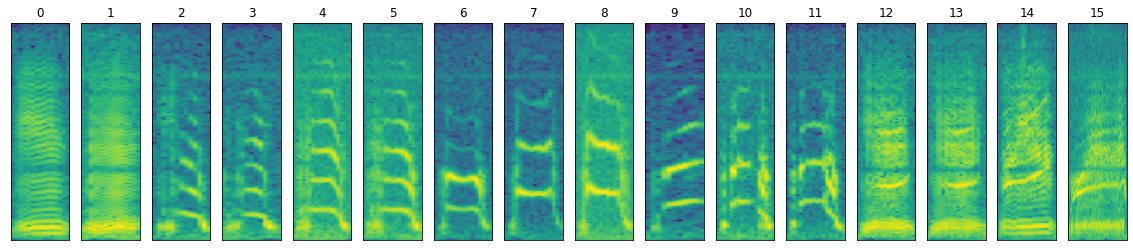

In [6]:
from scipy.io import wavfile
import numpy as np
from data_generator import *

idx = 3

def(data_name, )

data_dir = data_name[idx].split('_')[1]
data = '%s/%s.wav'%('data/w58y67/org/'+data_dir, data_name[idx])

x, y = wavfile.read(data)
syllables = data_syllable[data_syllable[:,0]==idx]

fig = plt.figure(figsize=(20,4))
plt.specgram(y[:,0][:], Fs = x)
plt.title(data)
plt.show()


fig = plt.figure(figsize=(20,4))
for i in range(len(syllables)):
    start = syllables[i][1]
    end = start+syllables[i][2]
    
    plt.subplot(1,len(syllables),i+1)
    plt.title(i)
    
    plt.xticks([])
    plt.yticks([])
    plt.specgram(y[:,0][start:end], Fs = x)
    
plt.show()

In [82]:

for idx in range(1238, len(data_name)):
    print('* Data file number: ', idx)
        
    data_dir = data_name[idx].split('_')[1]
    data = '%s/%s.wav'%('data/w58y67/org/'+data_dir, data_name[idx])

    x, y = wavfile.read(data)
    syllables = data_syllable[data_syllable[:,0]==idx]

    for i in range(len(syllables)):
        syllable = syllables[i]
        
        start = syllable[1]
        end = start+syllable[2]

        fig = plt.figure(figsize=(0.64, 2.16))

        plt.specgram(y[:,0][start:end], Fs = x)
        plt.axis('off'), plt.xticks([]), plt.yticks([])
        plt.tight_layout()
        plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)

        plt.savefig('data/w58y67/step_2/syllable_imgs/'+'%s_%s.png'%(idx, i), bbox_inces='tight', 
                pad_inches=0, 
                dpi=100)
        plt.close('all')

* Data file number:  1238
* Data file number:  1239
* Data file number:  1240
* Data file number:  1241
* Data file number:  1242
* Data file number:  1243
* Data file number:  1244
* Data file number:  1245
* Data file number:  1246
* Data file number:  1247
* Data file number:  1248
* Data file number:  1249
* Data file number:  1250
* Data file number:  1251
* Data file number:  1252
* Data file number:  1253
* Data file number:  1254
* Data file number:  1255
* Data file number:  1256
* Data file number:  1257
* Data file number:  1258
* Data file number:  1259
* Data file number:  1260
* Data file number:  1261
* Data file number:  1262
* Data file number:  1263
* Data file number:  1264
* Data file number:  1265
* Data file number:  1266
* Data file number:  1267
* Data file number:  1268
* Data file number:  1269
* Data file number:  1270
* Data file number:  1271
* Data file number:  1272
* Data file number:  1273
* Data file number:  1274
* Data file number:  1275
* Data file 

* Data file number:  1554
* Data file number:  1555
* Data file number:  1556
* Data file number:  1557
* Data file number:  1558
* Data file number:  1559
* Data file number:  1560
* Data file number:  1561
* Data file number:  1562
* Data file number:  1563
* Data file number:  1564
* Data file number:  1565
* Data file number:  1566
* Data file number:  1567
* Data file number:  1568
* Data file number:  1569
* Data file number:  1570
* Data file number:  1571
* Data file number:  1572
* Data file number:  1573
* Data file number:  1574
* Data file number:  1575
* Data file number:  1576
* Data file number:  1577
* Data file number:  1578
* Data file number:  1579
* Data file number:  1580
* Data file number:  1581
* Data file number:  1582
* Data file number:  1583
* Data file number:  1584
* Data file number:  1585
* Data file number:  1586
* Data file number:  1587
* Data file number:  1588
* Data file number:  1589
* Data file number:  1590
* Data file number:  1591
* Data file 

* Data file number:  1870
* Data file number:  1871
* Data file number:  1872
* Data file number:  1873
* Data file number:  1874
* Data file number:  1875
* Data file number:  1876
* Data file number:  1877
* Data file number:  1878
* Data file number:  1879
* Data file number:  1880
* Data file number:  1881
* Data file number:  1882
* Data file number:  1883
* Data file number:  1884
* Data file number:  1885
* Data file number:  1886
* Data file number:  1887
* Data file number:  1888
* Data file number:  1889
* Data file number:  1890
* Data file number:  1891
* Data file number:  1892
* Data file number:  1893
* Data file number:  1894
* Data file number:  1895
* Data file number:  1896
* Data file number:  1897
* Data file number:  1898
* Data file number:  1899
* Data file number:  1900
* Data file number:  1901
* Data file number:  1902
* Data file number:  1903
* Data file number:  1904
* Data file number:  1905
* Data file number:  1906
* Data file number:  1907
* Data file 

* Data file number:  2186
* Data file number:  2187
* Data file number:  2188
* Data file number:  2189
* Data file number:  2190
* Data file number:  2191
* Data file number:  2192
* Data file number:  2193
* Data file number:  2194
* Data file number:  2195
* Data file number:  2196
* Data file number:  2197
* Data file number:  2198
* Data file number:  2199
* Data file number:  2200
* Data file number:  2201
* Data file number:  2202
* Data file number:  2203
* Data file number:  2204
* Data file number:  2205
* Data file number:  2206
* Data file number:  2207
* Data file number:  2208
* Data file number:  2209
* Data file number:  2210
* Data file number:  2211
* Data file number:  2212
* Data file number:  2213
* Data file number:  2214
* Data file number:  2215
* Data file number:  2216
* Data file number:  2217
* Data file number:  2218
* Data file number:  2219
* Data file number:  2220
* Data file number:  2221
* Data file number:  2222
* Data file number:  2223
* Data file 

* Data file number:  2502
* Data file number:  2503
* Data file number:  2504
* Data file number:  2505
* Data file number:  2506
* Data file number:  2507
* Data file number:  2508
* Data file number:  2509
* Data file number:  2510
* Data file number:  2511
* Data file number:  2512
* Data file number:  2513
* Data file number:  2514
* Data file number:  2515
* Data file number:  2516
* Data file number:  2517
* Data file number:  2518
* Data file number:  2519
* Data file number:  2520
* Data file number:  2521
* Data file number:  2522
* Data file number:  2523
* Data file number:  2524
* Data file number:  2525
* Data file number:  2526
* Data file number:  2527
* Data file number:  2528
* Data file number:  2529
* Data file number:  2530
* Data file number:  2531
* Data file number:  2532
* Data file number:  2533
* Data file number:  2534
* Data file number:  2535
* Data file number:  2536
* Data file number:  2537
* Data file number:  2538
* Data file number:  2539
* Data file 

* Data file number:  2818
* Data file number:  2819
* Data file number:  2820
* Data file number:  2821
* Data file number:  2822
* Data file number:  2823
* Data file number:  2824
* Data file number:  2825
* Data file number:  2826
* Data file number:  2827
* Data file number:  2828
* Data file number:  2829
* Data file number:  2830
* Data file number:  2831
* Data file number:  2832
* Data file number:  2833
* Data file number:  2834
* Data file number:  2835
* Data file number:  2836
* Data file number:  2837
* Data file number:  2838
* Data file number:  2839
* Data file number:  2840
* Data file number:  2841
* Data file number:  2842
* Data file number:  2843
* Data file number:  2844
* Data file number:  2845
* Data file number:  2846
* Data file number:  2847
* Data file number:  2848
* Data file number:  2849
* Data file number:  2850
* Data file number:  2851
* Data file number:  2852
* Data file number:  2853
* Data file number:  2854
* Data file number:  2855
* Data file 

* Data file number:  3134
* Data file number:  3135
* Data file number:  3136
* Data file number:  3137
* Data file number:  3138
* Data file number:  3139
* Data file number:  3140
* Data file number:  3141
* Data file number:  3142
* Data file number:  3143
* Data file number:  3144
* Data file number:  3145
* Data file number:  3146
* Data file number:  3147
* Data file number:  3148
* Data file number:  3149
* Data file number:  3150
* Data file number:  3151
* Data file number:  3152
* Data file number:  3153
* Data file number:  3154
* Data file number:  3155
* Data file number:  3156
* Data file number:  3157
* Data file number:  3158
* Data file number:  3159
* Data file number:  3160
* Data file number:  3161
* Data file number:  3162
* Data file number:  3163
* Data file number:  3164
* Data file number:  3165
* Data file number:  3166
* Data file number:  3167
* Data file number:  3168
* Data file number:  3169
* Data file number:  3170
* Data file number:  3171
* Data file 

In [83]:
img_path = 'data/w58y67/step_2/syllable_imgs/'
img_list = glob.glob(img_path+'/*png')

In [84]:
len(img_list)

55037

In [85]:
x_data = []
# 이미지 열기
for img in img_list:
    im = Image.open(img)
    im = np.array(im)[:,:,:3]
    x_data.append(im)

In [86]:
x_data = np.array(x_data)
x_data.shape

(55037, 216, 64, 3)

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x_data, train_size = 0.9)
#x_valid, x_test = train_test_split(x_valid, train_size = 0.6)
print('* Training data shape: ', x_train.shape)
#print('* Validataion data shape : ', x_valid.shape)
print('* Test data shape : ', x_test.shape)

* Training data shape:  (49533, 216, 64, 3)
* Test data shape :  (5504, 216, 64, 3)


In [95]:
np.save('data/w58y67/step_2/x_train', x_train)
np.save('data/w58y67/step_2/x_test', x_test)